Assignment-2
## Mobile Usability

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


In [10]:
# Load the dataset
data= pd.read_csv("Mobile Usability.csv")

In [11]:
# Inspect the first few rows of the dataset
print("Dataset preview:")
print(data.head())

Dataset preview:
   years_used  battery_life_hours  usable
0        3.75                4.44       1
1        9.51                3.44       0
2        7.32                6.65       1
3        5.99                3.22       0
4        1.56                3.94       1


In [13]:
# Assuming the dataset has columns: 'years_used', 'battery_life' (features) and 'usable' (target)
# If column names differ, update these accordingly.
X = data[['years_used', 'battery_life_hours']]
y = data['usable']

In [14]:
# Split the data (70% train, 30% test) with a fixed random state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [15]:
# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [16]:
# Predictions on the test set
y_pred = model.predict(X_test)


In [17]:
# Evaluate the model using evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [18]:
# Print evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Precision: {precision:.2f}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.96
Recall: 1.00
Precision: 0.95
Confusion Matrix:
[[19  3]
 [ 0 53]]


In [19]:
# Manually calculate accuracy, recall, and precision
tp = conf_matrix[1, 1]
tn = conf_matrix[0, 0]
fp = conf_matrix[0, 1]
fn = conf_matrix[1, 0]

manual_accuracy = (tp + tn) / (tp + tn + fp + fn)
manual_recall = tp / (tp + fn)
manual_precision = tp / (tp + fp)

print(f"Manual Accuracy: {manual_accuracy:.2f}")
print(f"Manual Recall: {manual_recall:.2f}")
print(f"Manual Precision: {manual_precision:.2f}")

Manual Accuracy: 0.96
Manual Recall: 1.00
Manual Precision: 0.95


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


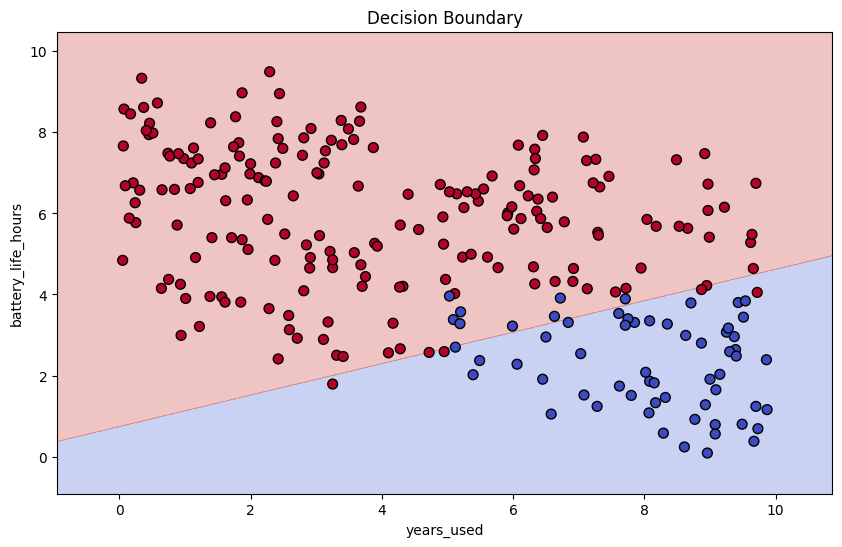

In [38]:
# Plot the decision boundary
plt.figure(figsize=(10, 6))
x_min, x_max = X['years_used'].min() - 1, X['years_used'].max() + 1
y_min, y_max = X['battery_life_hours'].min() - 1, X['battery_life_hours'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Use 'red' and 'green' for the ListedColormap or their RGB equivalents

plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X['years_used'], X['battery_life_hours'], c=y, edgecolors='k', cmap='coolwarm', s=50)
plt.title('Decision Boundary')
plt.xlabel('years_used')
plt.ylabel('battery_life_hours')
plt.show()
